# Hands-On Assignment 5

In this assignment, you will practice everything that you have learned so far in an end-to-end setting.
You will be provided with a dataset that is **unique to you**, and your task is to perform
all the steps from previous assignments to clean, explore, visualize, and analyze your dataset.

**Written Portion**: Additionally, you will create a report that describes your process and provides insights about your dataset.
Each section that should appear in your report is noted with an orange star (like normal HO tasks).  The report should be  4-6 pages (12 pt font, 1.5 line spacing), and turned in on Canvas as a PDF.

The coding aspect for this assignment will be turned in the same was as all other HO's,
by submitting this file to the autograder.


For this assignment, feel free to make additional functions instead of implementing everything in the provided function.

The objective of this assignment is for you to apply and solidify the skills you have learned in previous assignments.

# Prompt

You have graduated from this class, and are a huge success!
You landed a job doing data science at some fancy company.

You just got a new client with some really interesting problems you get to solve.
Unfortunately, because of a big mess-up on their side the data's metadata got corrupted up
(and the person that used to maintain the data just took a vow of silence and moved to a bog).

The only column you are sure about is the `label` column,
which contains a numeric label for each row.
Aside from that, the client does not know anything about the names, content, or even data types for each column.

Your task is to explore, clean, and analyze this data.
You should have already received an email with the details on obtaining your unique data.
Place it in the same directory as this notebook (and your `grade_local.py` script) and name it `data.txt`.

*I know this prompt may sound unrealistic, but I have literally been in a situation exactly like this.
I was working at a database startup, and one of our clients gave us data with over 70 columns and more than a million records and told us:
"The person who used to manage the data is no longer working with us, but this was the data they used to make all their decisions.
We also lost all the metadata information, like column names."
...
Working in industry is not always glamorous.
-Eriq*

# Part 0: Explore Your Data

Before you start doing things to/with your data, it's always a good idea to load up your data and take a look.

In [1]:
import pandas
import numpy as np
# import math
import re
import sklearn.base
import sklearn.datasets
import sklearn.inspection
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.neighbors
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.tree
import sklearn.ensemble
import scipy
import matplotlib.pyplot as plt
from matplotlib import ticker

# Modify this to point to your data.
unique_data = pandas.read_csv('data.txt', sep = "\t")
unique_data

,label,col_00,col_01,col_02,col_03,col_04,col_05,col_06,col_07,col_08,col_09,col_10,col_11
0,1,565 m^2,0.0719,bioengineering,"Computer Engineering, Biotechnology, Computer ...",308,DOG,34,-0.0333,1375,0.8656,-0.0761,377
1,0,851 m^2,0.3185,Applied Mathematics,"Human Computer Interaction, Computational Medi...",103,guinea pig,740,-0.0145,595,0.9723,0.7166,712
2,1,393 m^2,0.4696,Electrical Engineering,Applied Mathematics,934,pig,577,-0.0725,1340,0.9037,0.238,278
3,2,185 m^2,0.7433,Games and Playable Media,Games and Playable Media,868,hamster,927,0.8243,-1037,-0.0086,0.771,62
4,0,811 m^2,0.9232,Applied Mathematics,"Computer Game Design, Computer Engineering",617,ferret,232,0.3404,454,0.6932,0.6584,-66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,1,406 m^2,0.1942,Technology and Information Management,"Robotics Engineering, Games and Playable Media...",170,dog,-82,0.2629,1417,0.9888,0.1482,655
893,2,589 m^2,0.7204,Statistics,"Robotics Engineering, Technology and Informati...",1179,bird,639,1.1408,-52,0.2812,0.9751,210
894,2,308 m^2,0.3436,Games and Playable Media,"Applied Mathematics, Robotics Engineering",494,hamster,640,0.8917,413,0.1304,0.7852,171
895,0,1247 m^2,0.4184,Computer Game Design,"Natural Language Processing, Bioinformatics, C...",222,ferret,313,0.3410,418,0.4586,0.978,1060


Don't forget to checkout the column information.

In [2]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   897 non-null    int64  
 1   col_00  887 non-null    object 
 2   col_01  887 non-null    object 
 3   col_02  886 non-null    object 
 4   col_03  891 non-null    object 
 5   col_04  886 non-null    object 
 6   col_05  891 non-null    object 
 7   col_06  889 non-null    object 
 8   col_07  892 non-null    float64
 9   col_08  886 non-null    object 
 10  col_09  890 non-null    object 
 11  col_10  892 non-null    object 
 12  col_11  888 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 91.2+ KB


And any numeric information.

In [3]:
unique_data.describe()

,label,col_07
count,897.000000,892.000000
mean,0.981048,0.479739
std,0.809181,0.384061
min,0.000000,-0.645900
25%,0.000000,0.201775
50%,1.000000,0.449900
75%,2.000000,0.744350
max,2.000000,1.613400


<h4 style="color: darkorange";>★ Written Task: Introduction</h4>

Briefly describe the dataset you’re given and define the goal of the project and how you approach it.
For example, you can present a basic introduction of your data (shape and proposed data types)
and your goal is to use these features to predict the label of the response variable.
Then you propose a few models that are suitable for this project which will be introduced in the modeling section.

# Part 1: Data Cleaning

As always, we should start with data cleaning.
Take what you learned from HO3 to clean up this messy data to a point where it is ready for machine learning algorithms.

Some things you may want to do:
 - Deal with missing/empty values.
 - Fix numeric columns so that they actually contain numbers.
 - Remove inconsistencies from columns.
 - Assign a data type to each column.

<h4 style="color: darkorange";>★ Task 1.A</h4>

Complete the following function that takes in a DataFrame and outputs a clean version of the DataFrame.
You can assume that the frame has all the same structure as your unique dataset.
You can return the same or a new data frame.

In [4]:
def extract_numbers(column):  # help from TA
    for row_index in range(len(column)):
        curr_cell = str(column[row_index])
        extracted_string_num = re.findall(r"-?\d+(?:[.,]\d+)* ?%?", curr_cell)
        if len(extracted_string_num) == 0:
            # change to np.nan later!
            column[row_index] = 0
            continue
        first_num = extracted_string_num[0]
        if "%" in first_num:
            column[row_index] = float(first_num[0:-1].replace(",", "")) / 100
        elif "." in first_num:
            column[row_index] = float(first_num.replace(",", ""))
        else:
            column[row_index] = int(first_num.replace(",", ""))
    return column

def one_hot(frame, column_name):
    if frame.empty:
        return frame.copy()
    all_words = []
    for row_num in range(len(frame)):
        curr = str(frame[column_name][row_num])
        if "," in curr:
            word_list = curr.split(",")
        else:
            word_list = [curr]
        for i in range(len(word_list)):
            while word_list[i][0] == " ":
                word_list[i] = word_list[i][1:]
            while word_list[i][-1] == " ":
                word_list[i] = word_list[i][:-1]
            word_list[i] = word_list[i].lower()
        all_words.extend(word_list)
    all_words = set(all_words)
    all_words = list(all_words)
    if "nan" in all_words:
        all_words.remove("nan")
    if "?" in all_words:
        all_words.remove("?")
    if "n/a" in all_words:
        all_words.remove("n/a")
    if "none" in all_words:
        all_words.remove("none")
    if "null" in all_words:
        all_words.remove("null")
    new_frame = frame.copy()
    new_frame.drop(columns=column_name, axis=1, inplace=True)
    new_col_dict = {}
    for word in all_words:
        # word is one of the possible words, will match at least once
        name = column_name + ': ' + word
        # name will be the future column name of this new one hot
        values = []
        # will store the list of 1's and 0's
        for i in range(len(frame)):
            curr = str(frame[column_name][i])
            curr_list = curr.split(',')
            clean_list = []
            for original_word in curr_list:
                while original_word[0] == ' ':
                    original_word = original_word[1:]
                while original_word[-1] == ' ':
                    original_word = original_word[:-1]
                original_word = original_word.lower()
                clean_list.append(original_word)
            in_col = 0
            for clean_word in clean_list:
                if word == clean_word:
                    in_col = 1
            values.append(in_col)
        new_col_dict[name] = values
    dict_frame = pandas.DataFrame.from_dict(new_col_dict)
    new_frame = pandas.concat([new_frame, dict_frame], axis=1)
    return new_frame

def clean_data(frame):
    ret_frame = frame.copy()
    temp_dict = {}
    for column in frame:
        if column == 'label':
            continue
        count = 0
        num_iters = 0
        for num in range(len(frame)):
            num_iters += 1
            if len(re.findall(r"\d+(?:[.,]\d+)* ?%?", str(frame[column][num]))) > 0:
                count += 1
            if num_iters > 4:
                break
        if count > 0:
            temp_dict[column] = extract_numbers(frame[column].values.tolist())
        else:
            ret_frame = one_hot(ret_frame, column)
    for column_name in temp_dict.keys():
        ret_frame[column_name] = temp_dict[column_name]
    return ret_frame

unique_data = clean_data(unique_data)

# export DataFrame to text file
unique_data.to_excel(r'clean_data.xlsx', index=False)

unique_data

,label,col_00,col_01,col_04,col_06,col_07,col_08,col_09,col_10,col_11,...,col_05: guinea pig,col_05: rabbit,col_05: dog,col_05: fish,col_05: hamster,col_05: cat,col_05: pig,col_05: bird,col_05: rat,col_05: reptile
0,1,565,0.0719,308,34,-0.0333,1375,0.8656,-0.0761,377,...,0,0,1,0,0,0,0,0,0,0
1,0,851,0.3185,103,740,-0.0145,595,0.9723,0.7166,712,...,1,0,0,0,0,0,0,0,0,0
2,1,393,0.4696,934,577,-0.0725,1340,0.9037,0.2380,278,...,0,0,0,0,0,0,1,0,0,0
3,2,185,0.7433,868,927,0.8243,-1037,-0.0086,0.7710,62,...,0,0,0,0,1,0,0,0,0,0
4,0,811,0.9232,617,232,0.3404,454,0.6932,0.6584,-66,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,1,406,0.1942,170,-82,0.2629,1417,0.9888,0.1482,655,...,0,0,1,0,0,0,0,0,0,0
893,2,589,0.7204,1179,639,1.1408,-52,0.2812,0.9751,210,...,0,0,0,0,0,0,0,1,0,0
894,2,308,0.3436,494,640,0.8917,413,0.1304,0.7852,171,...,0,0,0,0,1,0,0,0,0,0
895,0,1247,0.4184,222,313,0.3410,418,0.4586,0.9780,1060,...,0,0,0,0,0,0,0,0,0,0


Now we should also be able to view all the numeric columns.

In [5]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 54 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   label                                          897 non-null    int64  
 1   col_00                                         897 non-null    int64  
 2   col_01                                         897 non-null    float64
 3   col_04                                         897 non-null    int64  
 4   col_06                                         897 non-null    int64  
 5   col_07                                         897 non-null    float64
 6   col_08                                         897 non-null    int64  
 7   col_09                                         897 non-null    float64
 8   col_10                                         897 non-null    float64
 9   col_11                                         897 non

In [6]:
unique_data.describe()

,label,col_00,col_01,col_04,col_06,col_07,col_08,col_09,col_10,col_11,...,col_05: guinea pig,col_05: rabbit,col_05: dog,col_05: fish,col_05: hamster,col_05: cat,col_05: pig,col_05: bird,col_05: rat,col_05: reptile
count,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,...,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000
mean,0.981048,578.350056,0.401916,487.978818,435.799331,0.477065,507.832776,0.581264,0.526798,433.028986,...,0.074693,0.069119,0.079153,0.081382,0.120401,0.056856,0.070234,0.100334,0.085842,0.100334
std,0.809181,407.243650,0.352993,394.588233,306.681372,0.384652,504.022481,0.440386,0.404229,413.803303,...,0.263043,0.253798,0.270128,0.273574,0.325612,0.231697,0.255684,0.300613,0.280286,0.300613
min,0.000000,-461.000000,-0.650900,-481.000000,-258.000000,-0.645900,-1037.000000,-0.632800,-0.620500,-804.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,263.000000,0.140400,173.000000,205.000000,0.195800,110.000000,0.238100,0.187100,155.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,577.000000,0.415800,517.000000,411.000000,0.448400,463.000000,0.622800,0.600200,419.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,883.000000,0.662200,778.000000,650.000000,0.743500,894.000000,0.920100,0.848000,727.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1697.000000,1.391200,1555.000000,1418.000000,1.613400,2047.000000,1.745800,1.454000,1638.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h4 style="color: darkorange";>★ Written Task: Data Cleaning</h4>

Describe the steps you took for data cleaning.
Why did you do this?
Did you have to make some choices along the way? If so, describe them.

# Part 2: Data Visualization

Once you have cleaned up the data, it is time to explore it and find interesting things.
Part of this exploration, will be visualizing the data in a way that makes it easier for yourself and others to understand.
Use what you have learned in HO1 and HO2 to create some visualizations for your dataset.

<h4 style="color: darkorange";>★ Written Task: Data Visualization</h4>

Create at least two different visualizations that help describe what you see in your dataset.
Include these visualizations in your report along with descriptions of
how you created the visualization,
what data preparation you had to do for the visualization (aside from the data cleaning in the previous part),
and what the visualization tells us about the data.

# Part 3: Modeling

Now that you have a good grasp of your clean data,
it is time to do some machine learning!
(Technically all our previous steps were also machine learning,
but now we get to use classifiers!)

Use the skills you developed to select **three** classifiers and implement them on your data.
For example, you can narrow down your choices to three classifiers which may include:
- Logistic regression
- K-nearest neighbors
- Decision tree
- Or others

<h4 style="color: darkorange";>★ Task 3.A</h4>

Complete the following function that takes in no parameters,
and returns a list with **three** untrained classifiers you are going to explore in this assignment.
This method may set parameters/options for the classifiers, but should not do any training/fitting.

For example, if you wanted to use logistic regression,
then **one** of your list items may be:
```
sklearn.linear_model.LogisticRegression()
```

In [7]:
def create_classifiers():
    # return [sklearn.ensemble.RandomForestClassifier(n_estimators=100),
    #         sklearn.ensemble.RandomForestClassifier(n_estimators=51),
    #         sklearn.ensemble.RandomForestClassifier(n_estimators=10)]

    return [sklearn.linear_model.LogisticRegression(),
            sklearn.ensemble.RandomForestClassifier(n_estimators=69),
            sklearn.neighbors.KNeighborsClassifier(n_neighbors=41),
            sklearn.linear_model.LinearRegression(),
            sklearn.linear_model.Perceptron(),
            sklearn.tree.DecisionTreeClassifier()
           ]

my_classifiers = create_classifiers()
my_classifiers

[LogisticRegression(),
 RandomForestClassifier(n_estimators=69),
 KNeighborsClassifier(n_neighbors=41),
 LinearRegression(),
 Perceptron(),
 DecisionTreeClassifier()]

In [8]:
FIGURE_SIZE = 10
FIGURE_RESOLUTION = 500
FIGURE_COLORMAP = 'RdBu_r'

def visualize_decision_boundary(classifier, features, labels, title = None):
    """
    Visualize the decision boundary of a trained binary classifier
    using the FIRST TWO columns of the passed in features.
    """

    figure, axis = plt.subplots(1, 1, figsize = (FIGURE_SIZE, FIGURE_SIZE))
    axis.set_title(title)

    # Draw the decision boundary.
    decision_boundary = sklearn.inspection.DecisionBoundaryDisplay.from_estimator(
        classifier, features,
        response_method = "predict", ax = axis,
        xlabel = features.columns[0], ylabel = features.columns[1],
        cmap = FIGURE_COLORMAP, grid_resolution = FIGURE_RESOLUTION
    )

    # Also display the data points.
    axis.scatter(
        features[features.columns[0]], features[features.columns[1]],
        c = labels, cmap = FIGURE_COLORMAP, alpha = 0.5,
    )

    # Add a legend for the colors.
    colorbar = figure.colorbar(decision_boundary.surface_, ax = axis, ticks = [0, 1, 2], spacing='uniform')
    colorbar.ax.set_yticklabels(["0", "1", "2"])
    # tick_locator = ticker.MaxNLocator(nbins=3)
    # colorbar.locator = tick_locator
    # colorbar.update_ticks()

    return axis

def fit_and_visualize_decision_boundary(classifier, features, labels, title = None):
    classifier.fit(features, labels)
    visualize_decision_boundary(classifier, features, labels, title = title)
    return classifier.score(features, labels)

Now that we have some classifiers, we can see how they perform.

<h4 style="color: darkorange";>★ Task 3.B</h4>

Complete the following function that takes in an untrained classifier, a DataFrame, and a number of folds.
This function should run k-fold cross validation with the classifier and the data,
and return a list with the accuracy of each run of cross validation.
You can assume that the frame has the column `label` and the rest of the columns can be considered clean numeric features.

Note that you may have to break your frame into features and labels to do this.
Do not change the passed-in frame (make copies instead).

If you are getting any `ConvergenceWarning`s you may either ignore them,
or try and address them
(they will not affect your autograder score, but may be something to discuss in the written portion of this assignment).

Classifier: LogisticRegression, Accuracy: [1.0, 1.0, 1.0, 0.994413407821229, 1.0].
Classifier: RandomForestClassifier, Accuracy: [0.9944444444444445, 0.9888888888888889, 1.0, 0.994413407821229, 0.994413407821229].
Classifier: KNeighborsClassifier, Accuracy: [1.0, 1.0, 0.9888268156424581, 0.994413407821229, 0.9888268156424581].
Classifier: LinearRegression, Accuracy: [0.9324211138328746, 0.947056430287391, 0.944797666810663, 0.9359618062883126, 0.9287977545423559].
Classifier: Perceptron, Accuracy: [1.0, 0.9888888888888889, 1.0, 0.994413407821229, 0.994413407821229].
Classifier: DecisionTreeClassifier, Accuracy: [0.9555555555555556, 0.9388888888888889, 0.9497206703910615, 0.9217877094972067, 0.9162011173184358].


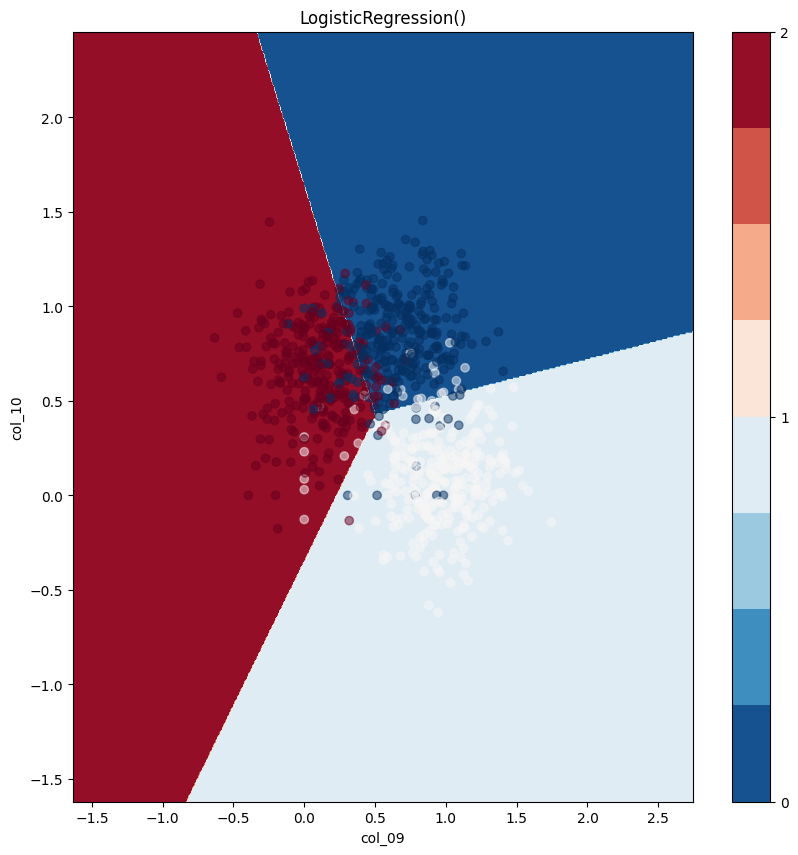

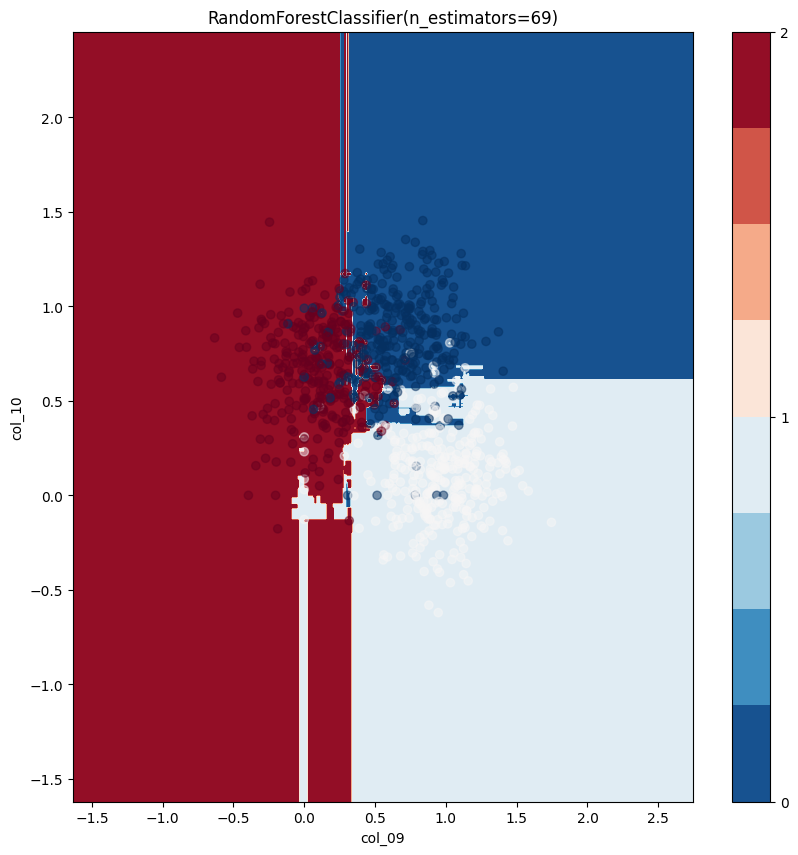

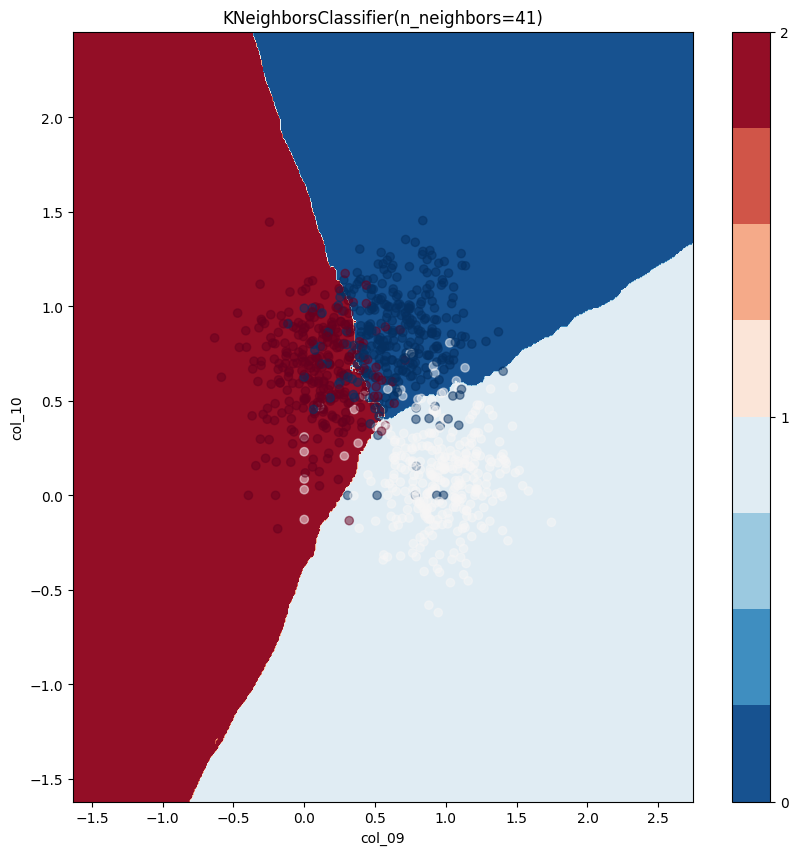

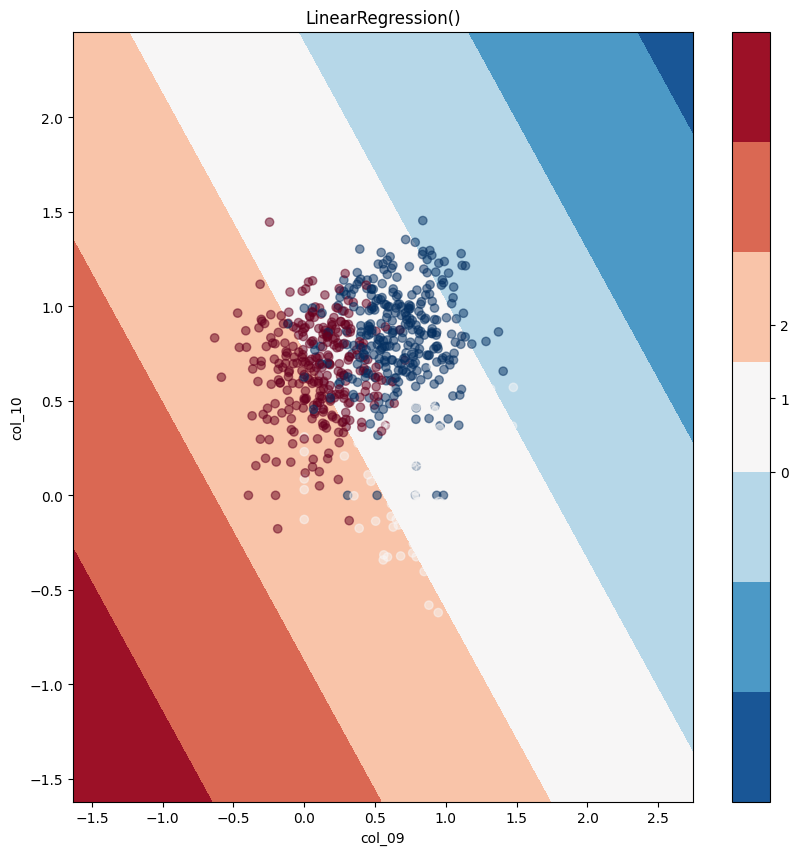

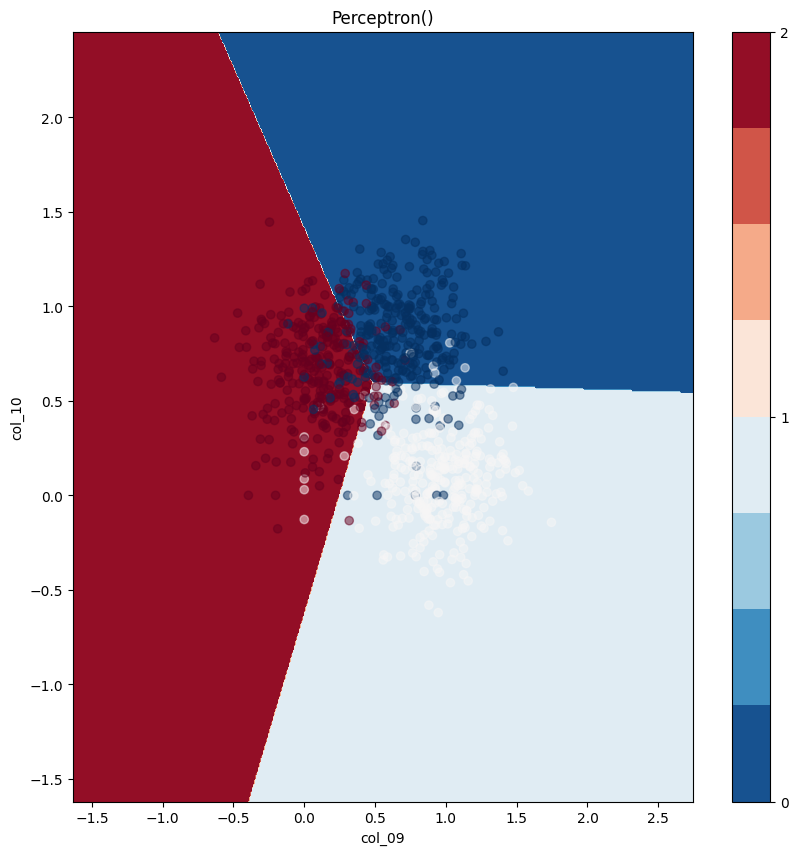

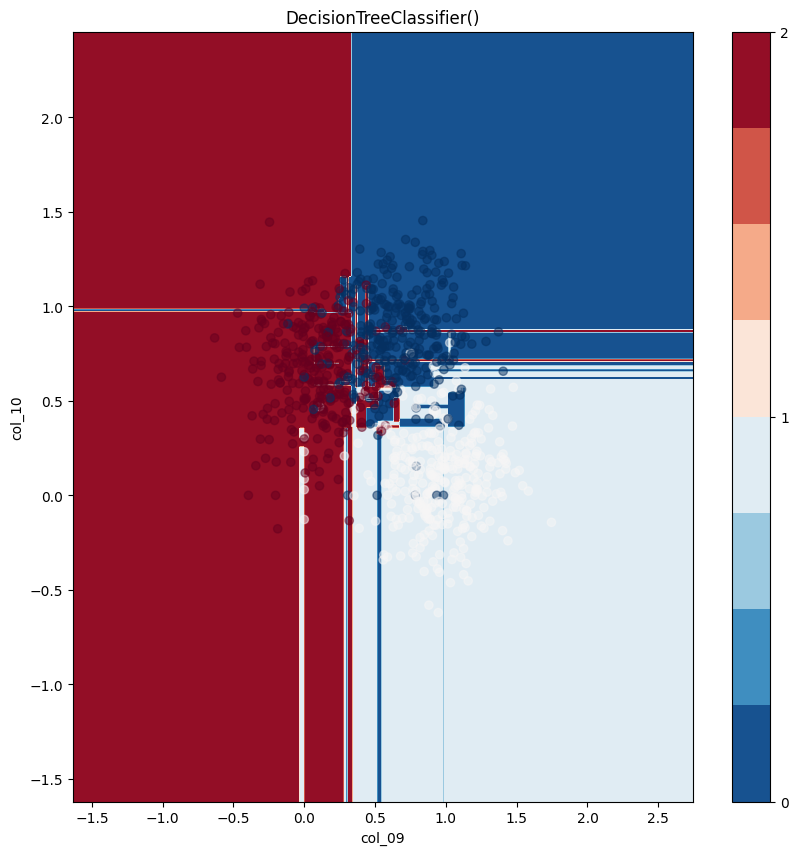

In [24]:
def cross_fold_validation(classifier, frame, folds):
    frame_data = frame.copy()
    two_features = frame[['col_09', 'col_10']]
    labels = frame_data.pop('label')
    pipeline = sklearn.pipeline.make_pipeline(sklearn.preprocessing.StandardScaler(), classifier)
    scores = sklearn.model_selection.cross_val_score(pipeline, X=frame_data, y=labels, cv=folds,
                                                     n_jobs=1)
    fit_and_visualize_decision_boundary(classifier, two_features, labels, title = classifier)
    return scores.tolist()

my_classifiers_scores = []
for classifier in my_classifiers:
    accuracy_scores = cross_fold_validation(classifier, unique_data, 5)
    my_classifiers_scores.append(accuracy_scores)
    print("Classifier: %s, Accuracy: %s." % (type(classifier).__name__, accuracy_scores))
    # print(np.max(accuracy_scores))
    # print(np.std(accuracy_scores))
    # print(np.mean(accuracy_scores))
    # print(np.min(accuracy_scores))
    

In [10]:
# classifiers_averages = {}
# num_iter = 0
# title = ""
# for model in my_classifiers:
#     if num_iter == 0:
#         title = "Logistic"
#     elif num_iter == 1:
#         title = "Forest"
#     elif num_iter == 2:
#         title = "KNN"
#     elif num_iter == 3:
#         title = "Linear"
#     elif num_iter == 4:
#         title = "Perceptron"
#     else:
#         title = "DT"
#     num_iter += 1
#     classifiers_averages[title] = []
#     print(model)
#     print(title)
#     for i in range(100):
#         score = cross_fold_validation(model, unique_data, 5)
#         classifiers_averages[title].extend(score)
    

In [11]:
# columns_to_plot = []
# for key in classifiers_averages.keys():
#     columns_to_plot.append(key)
# print(columns_to_plot)
# class_avgs_df = pandas.DataFrame.from_dict(classifiers_averages)
# boxplot = class_avgs_df.boxplot(column=columns_to_plot)


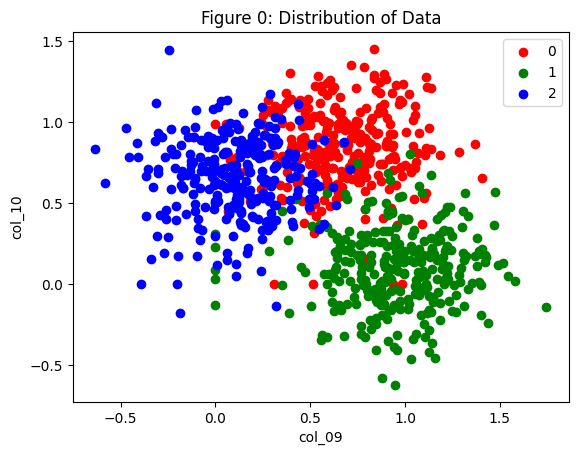

In [12]:
scatter_df = unique_data[['label', 'col_09', 'col_10']].copy()
# zero_df = scatter_df
# color_dict = {0 : 'blue', 1 : 'red', 2 : 'white'}
for i in range(3):
    temp_df = scatter_df[scatter_df['label'] == i]
    if i == 0:
        plt.scatter(x=temp_df['col_09'], y=temp_df['col_10'], c='red', label='0')
    elif i == 1:
        plt.scatter(x=temp_df['col_09'], y=temp_df['col_10'], c='green', label='1')
    else:
        plt.scatter(x=temp_df['col_09'], y=temp_df['col_10'], c='blue', label='2')
plt.title('Figure 0: Distribution of Data')
plt.xlabel('col_09')
plt.ylabel('col_10')
plt.legend()
# color_dict = {0 : 'blue', 1 : 'red', 2 : 'white'}
# ax1 = scatter_df.plot.scatter(x='col_09', y='col_10', c='red')
plt.show()

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

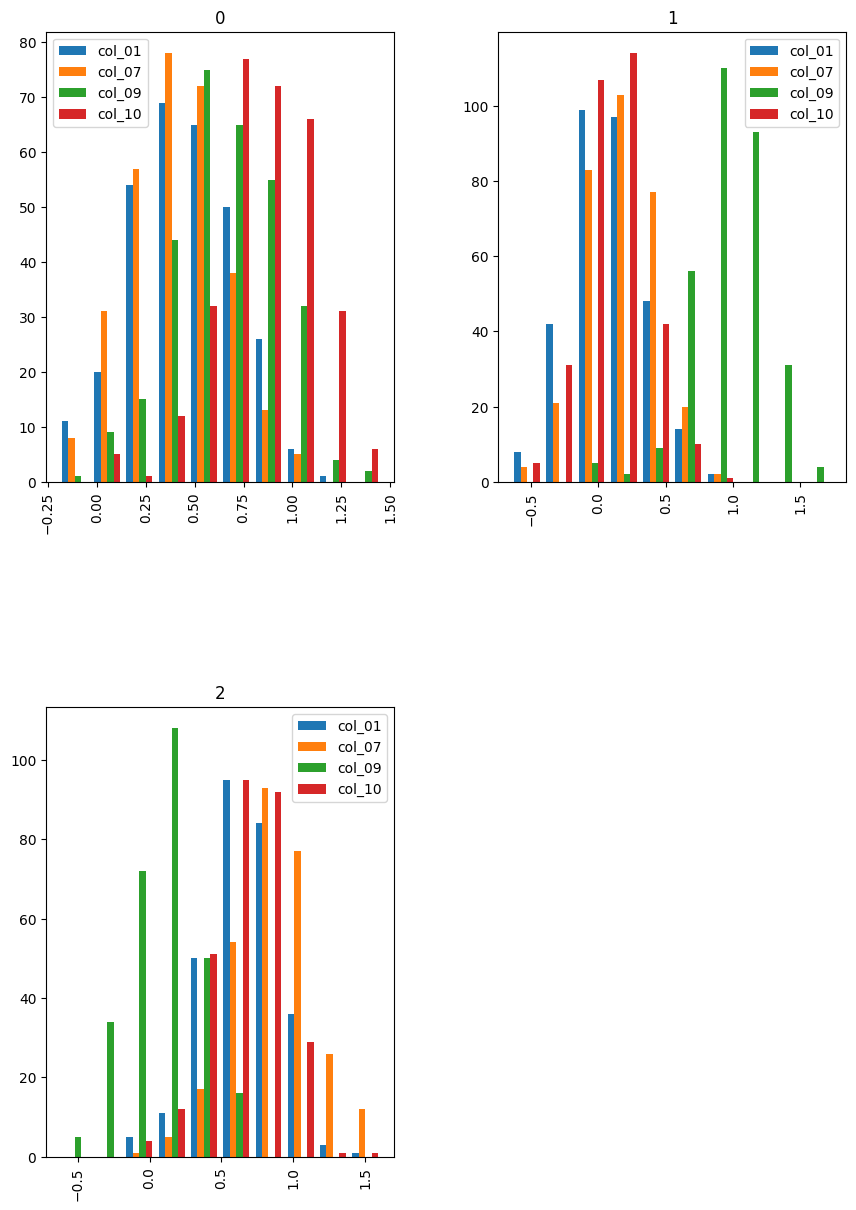

In [23]:
# column_names = ['col_01', 'col_04', 'col_06', 'col_07', 'col_08', 'col_09', 'col_10']
column_names = ['col_01', 'col_07', 'col_09', 'col_10']
unique_data.hist(column=column_names, by='label', xlabelsize=10, figsize=(10,15), legend=True)

In [ ]:
winners = []
for j in range(10):
    results = []
    avg = 0
    best = 0
    for i in range(1, 100):
        curr = cross_fold_validation(sklearn.ensemble.RandomForestClassifier(n_estimators=i), unique_data, 5)
        results.append(curr)
        if np.mean(curr) > avg:
            avg = np.mean(curr)
            best = i
    winners.append(best)
print(winners)
pandas.DataFrame(results).to_csv('Rand_Forest.csv')

In [ ]:
top_trials = {}
for num in winners:
    top_trials[num] = []
    for i in range(10):
        curr = cross_fold_validation(sklearn.ensemble.RandomForestClassifier(n_estimators=num), unique_data, 5)
        top_trials[num].extend(curr)
    print("Current:", num, "scored:", top_trials[num])


In [ ]:
pandas.DataFrame.from_dict(top_trials).to_csv('TenBestForests.csv')


In [ ]:
KNN_results = []
avg = 0
best = 0
for i in range(1, 100):
    curr = cross_fold_validation(sklearn.neighbors.KNeighborsClassifier(n_neighbors=i), unique_data, 5)
    KNN_results.append(curr)
    if np.mean(curr) > avg:
        avg = np.mean(curr)
        best = i
print("The best param is: ", best, " with an average of: ", avg)
pandas.DataFrame(KNN_results).to_csv('KNN.csv')

<h4 style="color: darkorange";>★ Task 3.C</h4>

Complete the following function that takes in two equally-sized lists of numbers and a p-value.
This function should compute whether there is a statistical significance between
these two lists of numbers using a [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)
at the given p-value.
Return `True` if there is a statistical significance, and `False` otherwise.
Hint: If you wish, you may use the `ttest_ind()` [method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) provided in the scipy package. 

In [ ]:
def significance_test(a_values, b_values, p_value):
    result = scipy.stats.ttest_ind(a=a_values, b=b_values)
    return True if (result.pvalue < p_value) else False

for i in range(len(my_classifiers)):
    for j in range(i + 1, len(my_classifiers)):
        significant = significance_test(my_classifiers_scores[i], my_classifiers_scores[j], 0.10)
        print("%s vs %s: %s" % (type(my_classifiers[i]).__name__,
                                type(my_classifiers[j]).__name__, significant))

In [ ]:
p_vals = {}
bigly = []
for classy_class in classifiers_averages.keys():
    bigly.append(classy_class)
for classifier in my_classifiers:
    output = scipy.stats.ttest_ind(a=classifiers_averages[bigly[0]], b=classifiers_averages[classifier])
    p_vals[classifier] = [output.pvalue]
print(p_vals)
pandas.DataFrame.from_dict(p_vals).to_csv('P_values.csv')  

In [ ]:
def good_p(a_values, b_values, p_value):
    return scipy.stats.ttest_ind(a=a_values, b=b_values).pvalue

ret_vals = {}
for col in unique_data.columns:
    # for j in range(i+1, len(column_names)):
    if col == 'label':
        continue
    
    label_col = unique_data['label']
    p_val = (scipy.stats.ttest_ind(a=label_col, b=unique_data[col]).pvalue)
    ret_vals[col] = [p_val]
print(ret_vals)
pandas.DataFrame.from_dict(ret_vals).to_csv('column_p_vals.csv') 
    # print('label' + ' vs. ' + col + ' ', p_val)

<h4 style="color: darkorange";>★ Written Task: Modeling</h4>

Describe the classifiers you have chosen.
Be sure to include all details about any parameter settings used for the algorithms.

Compare the performance of your models using k-fold validation.
You may look at accuracy, F1 or other measures.

Then, briefly summarize your results.
Are your results statistically significant?
Is there a clear winner?
What do the standard deviations look like, and what do they tell us about the different models?
Include a table like Table 1.

<center>Table 1: Every table need a caption.</center>

| Model | Mean Accuracy | Standard Deviation of Accuracy |
|-------|---------------|--------------------------------|
| Logistic Regression | 0.724 | 0.004
| K-Nearest Neighbor | 0.750 | 0.003
| Decision Tree | 0.655 | 0.011

# Part 4: Analysis

Now, take some time to go over your results for each classifier and try to make sense of them.
 - Why do some classifiers work better than others?
 - Would another evaluation metric work better than vanilla accuracy?
 - Is there still a problem in the data that should fixed in data cleaning?
 - Does the statistical significance between the different classifiers make sense?
 - Are there parameters for the classifier that I can tweak to get better performance?

<h4 style="color: darkorange";>★ Written Task: Analysis</h4>

Discuss your observations, the relationship you found, and how you applied concepts from the class to this project.
For example, you may find that some feature has the most impact in predicting your response variable or removing a feature improves the model accuracy.
Or you may observe that your training accuracy is much higher than your test accuracy and you may want to explain what issues may arise.

# Part 5: Conclusion

<h4 style="color: darkorange";>★ Written Task: Conclusion</h4>

Briefly summarize the important results and conclusions presented in the project.
What are the important points illustrated by your work?
Are there any areas for further investigation or improvement?

<h4 style="color: darkorange";>★ Written Task: References</h4>

Include a standard bibliography with citations referring to techniques or published papers you used throughout your report (if you used any).

For example:
```
[1] Derpanopoulos, G. (n.d.). Bayesian Model Checking & Comparison.
https://georgederpa.github.io/teaching/modelChecking.html.
```

# Part XC: Extra Credit

So far you have used a synthetic dataset that was created just for you.
But, data science is always more interesting when you are dealing with actual data from the real world.
Therefore, you will have an opportunity for extra credit on this assignment using real-world data.

For extra credit, repeat the **written tasks** of Parts 0 through 4 with an additional dataset that you find yourself.
For the written portion of the extra credit for Part 0, include information about where you got the data and what the data represents.
You may choose any dataset that represents real data (i.e., is **not** synthetic or generated)
and is **not** [pre-packaged in scikit-learn](https://scikit-learn.org/stable/datasets.html).

Below are some of the many places you can start looking for datasets:
 - [Kaggle](https://www.kaggle.com/datasets) -- Kaggle is a website focused around machine learning competitions,
       where people compete to see who can get the best results on a dataset.
       It is very popular in the machine learning community and has thousands of datasets with descriptions.
       Make sure to read the dataset's description, as Kaggle also has synthetic datasets.
 - [data.gov](https://data.gov/) -- A portal for data from the US government.
        The US government has a lot of data, and much of it has to be available to the public by law.
        This portal contains some of the more organized data from several different government agencies.
        In general, the government has A LOT of interesting data.
        It may not always be clean (remember the CIA factbook), but it is interesting and available.
        All data here should be real-world, but make sure to read the description to verify.
 - [UCI's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php) -- UC Irvine has their own data repository with a few hundred datasets on many different topics.
        Make sure to read the dataset's description, as UCI also has synthetic datasets.
 - [WHO's Global Health Observatory](https://apps.who.int/gho/data/node.home) -- The World Health Organization keeps track of many different health-related statistics for most of the countries in the world.
        All data here should be real-world, but make sure to read the description to verify.
 - [Google's Dataset Search](https://datasetsearch.research.google.com/) -- Google indexes many datasets that can be searched here.

You can even create a dataset from scratch if you find some data you like that is not already organized into a specific dataset.
The only real distinction between "data" and a "dataset" is that a dataset is organized and finite (has a fixed size).

Create a new section in your written report for this extra credit and include all the written tasks for the extra credit there.
Each written task/section that you complete for your new dataset is eligible for extra credit (so you can still receive some extra credit even if you do not complete all parts).
There is no need to submit any code for the extra credit.
If you created a new dataset, include the dataset or links to it with your submission.